In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
df = pd.read_csv('Delivery time/deliverytime.csv')

In [5]:
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [20]:
distance_arr = []

In [8]:
# Restaurant_latitude = df['Restaurant_latitude'].values
# Restaurant_longitude = df['Restaurant_longitude'].values
# Delivery_location_latitude = df['Delivery_location_latitude'].values
# Delivery_location_longitude = df['Delivery_location_longitude'].values
for i in range(len(df)):
    dist = distance(df.loc[i, 'Restaurant_latitude'], df.loc[i, 'Delivery_location_latitude'], df.loc[i, 'Restaurant_longitude'], df.loc[i, 'Delivery_location_longitude'])
    dist = dist * 1.609344
    df.loc[i, 'distance'] = dist

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
 11  distance                     45593 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.2+ MB
None


# Relationship Between Distance(km) and Time Taken(min)

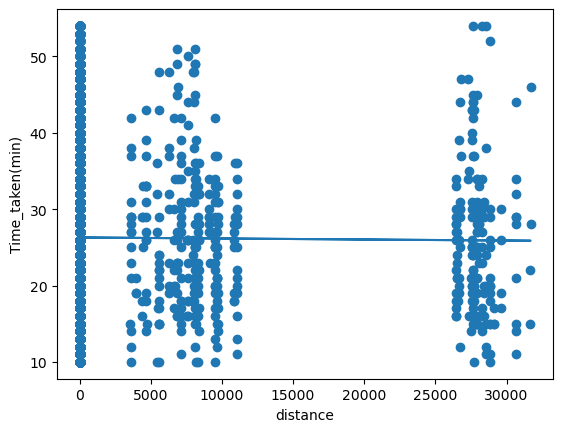

In [19]:
plt.xlabel('distance')
plt.ylabel('Time_taken(min)')
plt.scatter(df['distance'].values, df['Time_taken(min)'].values)
z = np.polyfit(df['distance'].values, df['Time_taken(min)'].values, 1)
p = np.poly1d(z)
plt.plot(df['distance'].values, p(df['distance'].values))
plt.show()

# Relationship Between Delivery_person_Age and Time Taken(min)

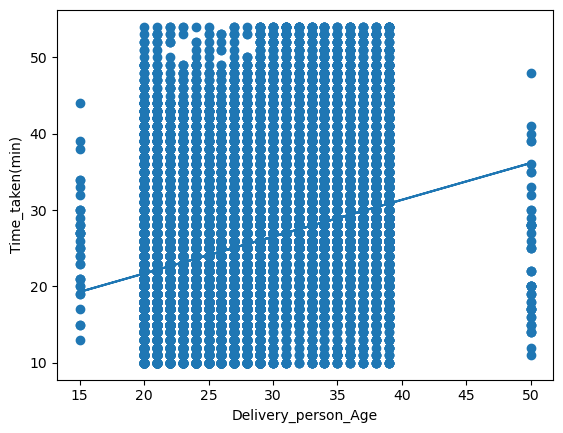

In [20]:
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken(min)')
plt.scatter(df['Delivery_person_Age'].values, df['Time_taken(min)'].values)
z = np.polyfit(df['Delivery_person_Age'].values, df['Time_taken(min)'].values, 1)
p = np.poly1d(z)
plt.plot(df['Delivery_person_Age'].values, p(df['Delivery_person_Age'].values))
plt.show()

# Relationship Between Delivery_person_Ratings and Time Taken(min)

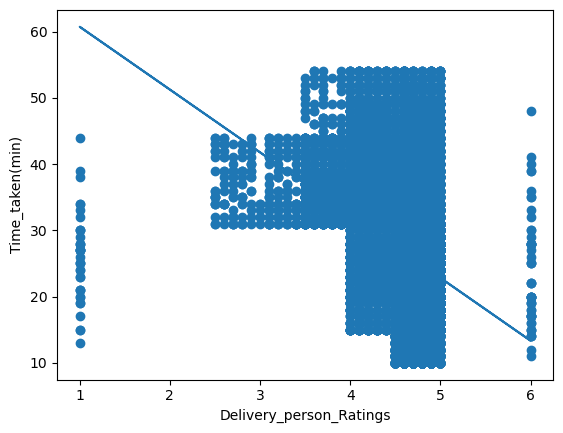

In [21]:
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time_taken(min)')
plt.scatter(df['Delivery_person_Ratings'].values, df['Time_taken(min)'].values)
z = np.polyfit(df['Delivery_person_Ratings'].values, df['Time_taken(min)'].values, 1)
p = np.poly1d(z)
plt.plot(df['Delivery_person_Ratings'].values, p(df['Delivery_person_Ratings'].values))
plt.show()

In [30]:
Type_of_vehicle = df['Type_of_vehicle'].values
time_taken = df['Time_taken(min)'].values
motorcycle = time_taken[Type_of_vehicle == 'motorcycle ']
scooter = time_taken[Type_of_vehicle == 'scooter ']
electric_scooter = time_taken[Type_of_vehicle == 'electric_scooter ']
bicycle = time_taken[Type_of_vehicle == 'bicycle ']
data = [motorcycle, scooter, electric_scooter, bicycle]

# Relationship Between Type_of_vehicle and Time Taken(min)

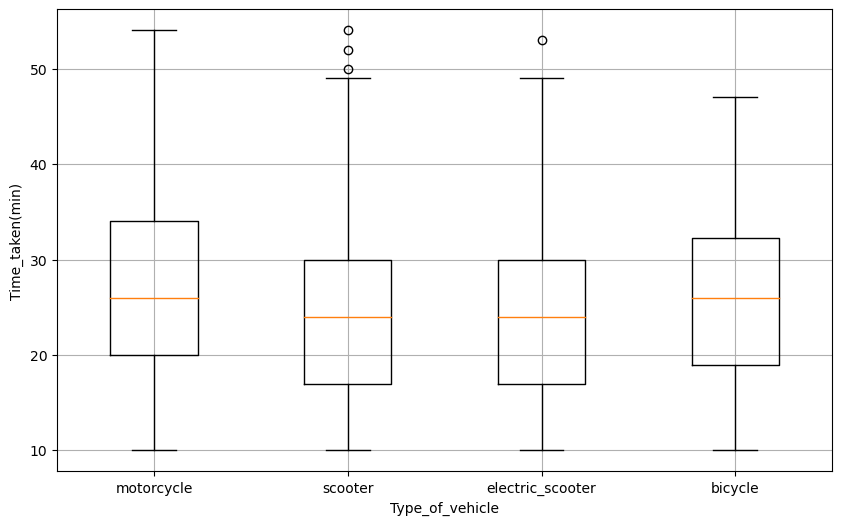

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['motorcycle', 'scooter', 'electric_scooter', 'bicycle'])
plt.xlabel('Type_of_vehicle')
plt.ylabel('Time_taken(min)')
plt.grid(True)
plt.show()

In [33]:
x = np.array(df[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance']])
y = df.iloc[:, -1].values

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xTrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

D:\Programs\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xTrain, yTrain, batch_size=1, epochs=9)

Epoch 1/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 259s 7ms/step - loss: 2584084.5000
Epoch 2/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 241s 7ms/step - loss: 1038317.0625
Epoch 3/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 251s 7ms/step - loss: 881160.8750
Epoch 4/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 253s 7ms/step - loss: 897140.3125
Epoch 5/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 247s 7ms/step - loss: 1100330.2500
Epoch 6/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 242s 7ms/step - loss: 946630.2500
Epoch 7/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 252s 7ms/step - loss: 928274.3750
Epoch 8/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 261s 7ms/step - loss: 941545.3750
Epoch 9/9
36474/36474 ━━━━━━━━━━━━━━━━━━━━ 239s 7ms/step - loss: 1082790.3750


In [39]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 25
Ratings of Previous Deliveries: 4
Total Distance: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
Predicted Delivery Time in Minutes =  [[10.027551]]
